In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip3 install --upgrade fastai
!pip install fast_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.6 MB/s eta 0:00:00


In [3]:
from fastai.tabular.all import *
from fast_tabnet.core import *
from pathlib import Path

In [42]:
root = "/kaggle/input/higgsb/training.csv"


df = pd.read_csv(root)
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [43]:
df.info

<bound method DataFrame.info of         EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0        100000       138.470                       51.655        97.827   
1        100001       160.937                       68.768       103.235   
2        100002      -999.000                      162.172       125.953   
3        100003       143.905                       81.417        80.943   
4        100004       175.864                       16.915       134.805   
...         ...           ...                          ...           ...   
249995   349995      -999.000                       71.989        36.548   
249996   349996      -999.000                       58.179        68.083   
249997   349997       105.457                       60.526        75.839   
249998   349998        94.951                       19.362        68.812   
249999   349999      -999.000                       72.756        70.831   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_je

In [44]:
df.describe

<bound method NDFrame.describe of         EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0        100000       138.470                       51.655        97.827   
1        100001       160.937                       68.768       103.235   
2        100002      -999.000                      162.172       125.953   
3        100003       143.905                       81.417        80.943   
4        100004       175.864                       16.915       134.805   
...         ...           ...                          ...           ...   
249995   349995      -999.000                       71.989        36.548   
249996   349996      -999.000                       58.179        68.083   
249997   349997       105.457                       60.526        75.839   
249998   349998        94.951                       19.362        68.812   
249999   349999      -999.000                       72.756        70.831   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_

In [45]:
df["Label"].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [46]:
dep_var = "Label"

In [47]:
continuous_vars, categorical_vars = cont_cat_split(df, dep_var=dep_var)

In [48]:
df[continuous_vars].info

<bound method DataFrame.info of         EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0        100000       138.470                       51.655        97.827   
1        100001       160.937                       68.768       103.235   
2        100002      -999.000                      162.172       125.953   
3        100003       143.905                       81.417        80.943   
4        100004       175.864                       16.915       134.805   
...         ...           ...                          ...           ...   
249995   349995      -999.000                       71.989        36.548   
249996   349996      -999.000                       58.179        68.083   
249997   349997       105.457                       60.526        75.839   
249998   349998        94.951                       19.362        68.812   
249999   349999      -999.000                       72.756        70.831   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_je

In [49]:
continuous_vars.remove("EventId")



In [50]:
df[continuous_vars].nunique()

DER_mass_MMC                   108338
DER_mass_transverse_met_lep    101637
DER_mass_vis                   100558
DER_pt_h                       115563
DER_deltaeta_jet_jet             7087
DER_mass_jet_jet                68366
DER_prodeta_jet_jet             16593
DER_deltar_tau_lep               4692
DER_pt_tot                      59042
DER_sum_pt                     156098
DER_pt_ratio_lep_tau             5931
DER_met_phi_centrality           2829
DER_lep_eta_centrality           1002
PRI_tau_pt                      59639
PRI_tau_eta                      4971
PRI_tau_phi                      6285
PRI_lep_pt                      61929
PRI_lep_eta                      4987
PRI_lep_phi                      6285
PRI_met                         87836
PRI_met_phi                      6285
PRI_met_sumet                  179740
PRI_jet_leading_pt              86590
PRI_jet_leading_eta              8558
PRI_jet_leading_phi              6285
PRI_jet_subleading_pt           42464
PRI_jet_subl

In [51]:
df[categorical_vars].nunique()

PRI_jet_num    4
dtype: int64

In [52]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [53]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = categorical_vars,
                   cont_names = continuous_vars,
                   y_names='Label',
                   y_block=CategoryBlock(),
                   splits=splits)

In [54]:
to.xs.iloc[:2]

,PRI_jet_num,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
183728,2,0.453992,-0.020930,0.114806,0.145727,-0.639698,-0.604904,-0.639693,0.319178,0.553972,...,0.845643,0.479977,0.82955,0.818162,0.812722,-0.639285,-0.639697,-0.639698,0.205965,-0.868337
201501,2,0.382613,0.300882,-0.277113,0.280462,-0.639698,-0.604904,-0.639693,-0.098582,-0.168950,...,-1.661065,0.597649,0.79558,0.816050,0.817299,-0.639285,-0.639697,-0.639698,0.021517,-0.868337


In [55]:
dls = to.dataloaders(bs=1000)

In [24]:
dls.show_batch()

,PRI_jet_num,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,1,136.483001,103.160006,67.712997,29.395000,-999.000013,-999.000001,-999.000002,2.952,7.375999,101.869004,2.114,-1.355,-998.999988,22.886000,-2.083,-2.597,48.373001,-1.651,0.766,55.846001,-2.129,184.280000,30.609987,-0.165988,1.305987,-998.999992,-999.000010,-999.000002,30.609999,b
1,2,121.826004,26.859000,60.397998,240.998009,0.758018,84.905979,0.914996,1.040,1.639000,367.971979,0.953,1.324,0.000995,61.894002,-1.793,-0.047,58.981998,-2.041,0.964,136.628004,0.663,409.586003,216.662942,-0.649993,-2.491993,30.432978,-1.408018,-3.133010,247.095990,s
2,1,99.174007,52.199001,62.075001,40.624000,-999.000013,-999.000001,-999.000002,2.748,22.363001,94.164005,0.729,1.153,-998.999988,37.061001,-1.126,1.238,27.016001,-1.119,-2.297,26.659000,1.314,135.268994,30.086006,1.938982,-2.165971,-998.999992,-999.000010,-999.000002,30.085998,b
3,0,-998.999979,80.563004,43.674000,6.357996,-999.000013,-999.000001,-999.000002,1.238,6.357999,75.715000,0.786,-1.394,-998.999988,42.387001,0.189,0.808,33.327999,0.283,2.042,55.944000,-1.836,152.119003,-998.999991,-998.999992,-999.000006,-998.999992,-999.000010,-999.000002,-0.000001,b
4,1,85.049008,74.494003,59.000000,0.971001,-999.000013,-999.000001,-999.000002,2.489,29.164000,97.234998,2.203,-1.321,-998.999988,20.966999,0.652,-1.672,46.186001,0.586,2.123,31.254000,-0.621,92.272001,30.082002,-2.747000,-0.601987,-998.999992,-999.000010,-999.000002,30.082000,b
5,2,90.463000,1.362997,58.936001,113.739999,1.823987,181.540992,-0.137022,1.495,2.958000,221.684007,1.322,0.889,0.015973,31.489000,-0.447,1.524,41.626999,1.020,1.242,41.650002,1.209,304.053988,90.399999,0.079005,-1.308986,58.167958,-1.745010,-2.790989,148.567993,b
6,1,104.613999,64.319001,69.958000,101.914002,-999.000013,-999.000001,-999.000002,1.769,30.492001,164.843994,1.354,1.277,-998.999988,38.476002,1.019,-1.631,52.084999,0.694,2.914,48.858001,-1.987,226.272995,74.282998,0.359000,0.627020,-998.999992,-999.000010,-999.000002,74.282997,b
7,2,124.643991,12.474000,59.554002,91.811996,2.512980,145.491973,1.132042,2.358,2.738001,148.057007,1.075,1.234,0.912999,28.086000,-2.283,-1.698,30.179001,-1.266,2.457,68.654000,2.732,192.712005,48.518013,-2.903026,-0.178016,41.272997,-0.390017,-0.275014,89.791999,s
8,2,-998.999979,65.143997,63.493000,49.457001,0.616015,120.421057,2.051046,2.821,1.743000,181.171006,1.424,-1.410,0.000021,23.149000,-0.765,1.080,32.957000,0.434,-2.650,61.236000,-1.028,215.597000,85.925996,1.157013,1.590005,39.138974,1.772998,-1.906966,125.066003,b
9,1,120.148997,70.360000,61.351002,32.611000,-999.000013,-999.000001,-999.000002,3.054,13.806000,91.621004,1.780,1.404,-998.999988,21.333000,-0.880,-1.958,37.977001,-0.076,1.379,38.140999,-2.546,220.667999,32.310997,-3.719006,0.547009,-998.999992,-999.000010,-999.000002,32.311002,b


In [56]:
dls.valid.show_batch()

,PRI_jet_num,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,3,114.954994,23.422999,81.094002,248.551005,1.630989,384.599026,0.465021,0.873,91.085995,584.388996,1.348,1.348,0.458976,81.707000,-0.019,-0.060,110.109000,0.343,0.734,71.430999,0.469,603.408015,231.829970,0.247994,-2.556993,88.619009,1.879023,1.085041,392.574006,0.002653,s
1,0,99.333992,7.210000,66.333000,62.312000,-999.000011,-999.000005,-998.999999,2.315,62.312001,56.809996,1.339,0.736,-998.999995,24.285999,0.343,-2.333,32.522999,-1.328,2.348,28.841999,2.112,161.423996,-998.999945,-999.000044,-998.999998,-998.999995,-998.999991,-999.000005,-0.000002,0.071357,b
2,1,103.064008,10.402998,55.458000,53.308998,-999.000011,-999.000005,-998.999999,3.098,20.261000,90.158998,1.219,1.379,-998.999995,22.784000,0.851,-1.003,27.768998,-0.062,1.958,46.949001,1.669,150.749998,39.605995,-0.715011,-1.192001,-998.999995,-998.999991,-999.000005,39.606000,1.681611,b
3,2,239.362999,39.597999,188.315004,77.620002,3.354993,669.292066,-2.814024,3.028,1.611000,335.603999,0.742,-0.704,0.478014,50.980000,1.585,-1.564,37.805000,-1.422,-1.204,10.410999,2.065,318.326995,146.433016,-1.658993,2.376007,100.387000,1.697004,-0.232010,246.820010,1.260220,b
4,2,109.031992,40.576999,61.380001,100.864997,4.138962,360.883034,-3.666978,1.822,6.297000,177.951004,0.870,1.413,0.932000,41.587002,1.235,-1.997,36.199002,1.335,-0.177,52.929001,-1.141,211.270996,69.631006,-1.285012,2.150988,30.534023,2.853987,1.797005,100.164999,0.001503,s
5,2,119.335999,49.868999,73.337998,95.403998,3.343993,764.286995,-2.783020,2.024,3.156999,365.083007,0.812,1.393,0.786999,47.047001,1.384,0.087,38.213001,0.929,2.059,47.884998,0.814,435.118993,148.287010,-1.560006,-1.192001,131.536013,1.783986,2.650982,279.822996,0.001503,s
6,1,101.987002,40.374001,76.117996,106.851997,-999.000011,-999.000005,-998.999999,1.530,33.812001,204.421998,1.703,1.322,-998.999995,41.041000,-0.118,2.287,69.910004,-0.653,-2.563,23.767001,2.684,326.243013,93.471024,1.216016,0.282015,-998.999995,-998.999991,-999.000005,93.471000,0.309795,b
7,0,73.276000,30.141002,55.416999,4.148998,-999.000011,-999.000005,-998.999999,2.750,4.149000,56.815005,1.244,-1.413,-998.999995,25.320999,-1.859,1.107,31.493999,-1.836,-2.426,10.485001,-0.470,72.263003,-998.999945,-999.000044,-998.999998,-998.999995,-998.999991,-999.000005,-0.000002,4.363899,b
8,0,-998.999982,77.038002,31.483002,23.607999,-999.000011,-999.000005,-998.999999,1.433,23.608000,47.716994,1.239,-1.370,-998.999995,21.315001,-2.296,-2.895,26.402001,-1.964,1.995,59.638000,-0.662,200.095993,-998.999945,-999.000044,-998.999998,-998.999995,-998.999991,-999.000005,-0.000002,4.410566,b
9,0,82.051009,43.251999,57.527001,0.548000,-999.000011,-999.000005,-998.999999,2.953,0.548001,53.822999,1.582,-1.374,-998.999995,20.845000,1.125,1.532,32.978001,2.052,-1.948,14.899999,0.751,209.921997,-998.999945,-999.000044,-998.999998,-998.999995,-998.999991,-999.000005,-0.000002,1.681611,b


In [57]:
learn = tabular_learner(dls,layers=[300,200,100,50],wd=0.01,train_bn=True, metrics=[accuracy,Precision()])

SuggestedLRs(valley=0.0008317637839354575)

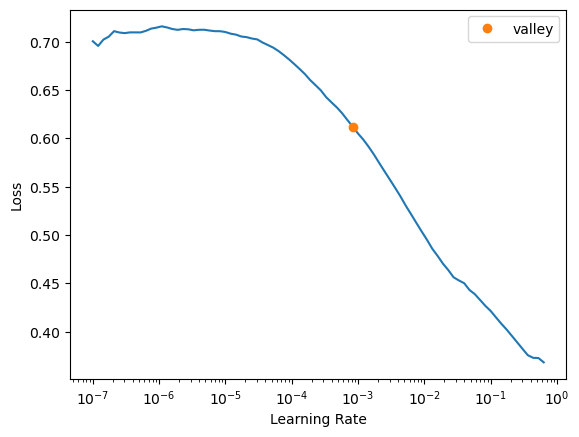

In [58]:
learn.lr_find()

In [59]:
learn.fine_tune(5,1e-3)

epoch,train_loss,valid_loss,accuracy,precision_score,time
0,0.151684,0.129595,0.954260,0.895129,00:05


epoch,train_loss,valid_loss,accuracy,precision_score,time
0,0.087921,0.090530,0.968180,0.939882,00:03
1,0.071831,0.065860,0.976000,0.962849,00:04
2,0.054422,0.048757,0.980940,0.956118,00:03
3,0.030784,0.040291,0.986320,0.987157,00:04
4,0.022350,0.023212,0.992400,0.985972,00:04


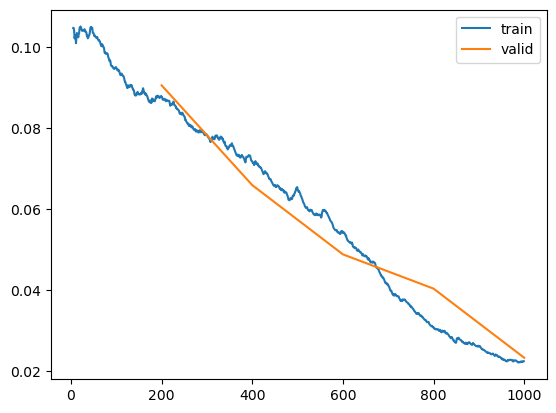

In [60]:
learn.recorder.plot_loss()

SuggestedLRs(valley=8.31763736641733e-06)

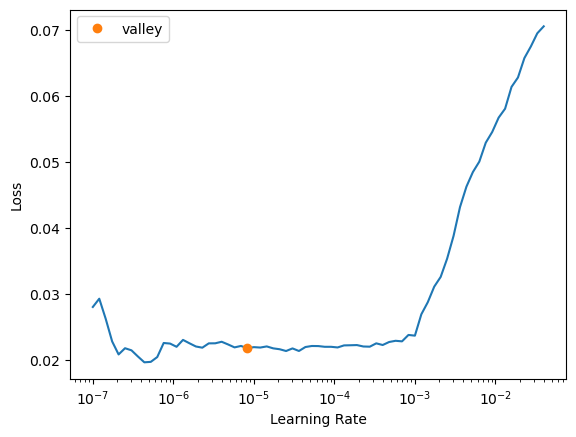

In [61]:
learn.lr_find()

In [63]:
learn.fit_one_cycle(4,lr_max=3e-7)

epoch,train_loss,valid_loss,accuracy,precision_score,time
0,0.021805,0.024041,0.991900,0.983761,00:04
1,0.021790,0.023325,0.992140,0.984444,00:04
2,0.021350,0.022065,0.992880,0.986385,00:04
3,0.021602,0.023394,0.992000,0.982483,00:03


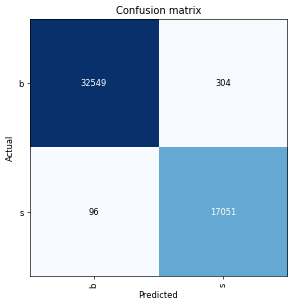

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [66]:
interp.print_classification_report()

              precision    recall  f1-score   support

           b       1.00      0.99      0.99     32853
           s       0.98      0.99      0.99     17147

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



In [67]:
learn.export('myModel.pkl')